# Kaplan-Meier Survival Plots

In [1]:
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

## Lets try it with the TCGA dataset

In [2]:
tcga_metatata_file = '../Data/TCGA_OV_VST/TCGA_OV_VST_Metadata.tsv'
df = pd.read_csv(tcga_metatata_file, sep='\t')
df.dropna(inplace=True)

In [3]:
time = np.array(df['survival_time']) / 365
vital_status = df['vital_status']
age_at_diag = np.array(df['age_at_diagnosis'])
median_age = np.median(age_at_diag)
status_dict = {'Alive':0, 'Dead':1}
event = np.array([status_dict[s] for s in vital_status ])


In [4]:
median_age = np.median(age_at_diag)
b_young = age_at_diag < median_age
b_old = age_at_diag >= median_age

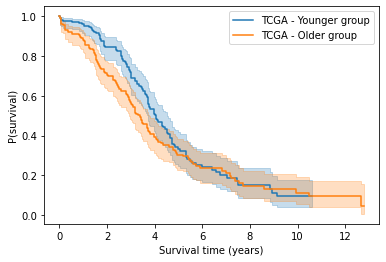

In [5]:
kmf = KaplanMeierFitter() 
kmf.fit(time[b_young], event[b_young])
axis1 = kmf.plot(label="TCGA - Younger group")

kmf.fit(time[b_old], event[b_old])
kmf.plot(ax=axis1, label="TCGA - Older group")
plt.xlabel("Survival time (years)")
plt.ylabel("P(survival)")
plt.show()

## Cox Proportional Hazard Model

In [6]:
df2 = pd.DataFrame()
df2['event'] = event
df2['years'] = time
df2['age_at_diag'] = age_at_diag / 365
df2['random'] = np.random.randn(len(df2))
df2['event_ish1'] = event + np.random.randn(len(df2))
df2['event_ish2'] = event + 0.1*np.random.randn(len(df2))


In [7]:
cph = CoxPHFitter()
cph.fit(df2, duration_col='years', event_col='event')
cph.print_summary()

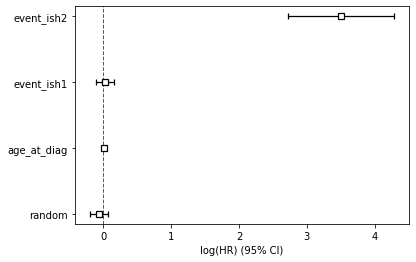

In [8]:
cph.plot()
plt.show()

## Conclusion
So we see that the younger age group has a better survival changes
upt to around 4 years, but the difference disapeares for longer survival times

In [9]:
import lifelines
dir(lifelines)

['AalenAdditiveFitter',
 'AalenJohansenFitter',
 'BreslowFlemingHarringtonFitter',
 'CRCSplineFitter',
 'CoxPHFitter',
 'CoxTimeVaryingFitter',
 'ExponentialFitter',
 'GeneralizedGammaFitter',
 'GeneralizedGammaRegressionFitter',
 'KaplanMeierFitter',
 'List',
 'LogLogisticAFTFitter',
 'LogLogisticFitter',
 'LogNormalAFTFitter',
 'LogNormalFitter',
 'MixtureCureFitter',
 'NelsonAalenFitter',
 'PiecewiseExponentialFitter',
 'PiecewiseExponentialRegressionFitter',
 'SplineFitter',
 'WeibullAFTFitter',
 'WeibullFitter',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'fitters',
 'plotting',
 'statistics',
 'utils',
 'version']